c:\Users\khize\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\khize\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\khize\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\khize\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

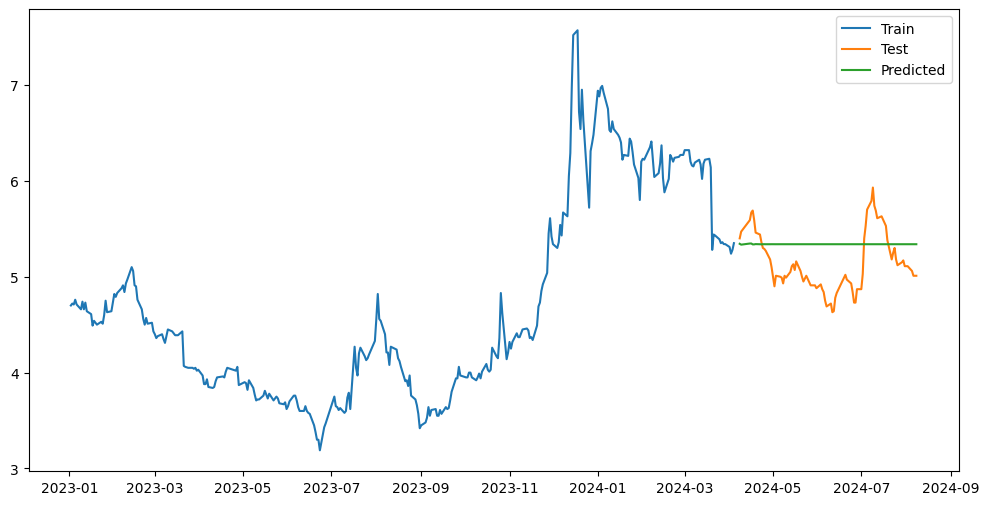

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  313
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 132.128
Date:                Sun, 11 Aug 2024   AIC                           -252.256
Time:                        13:10:30   BIC                           -229.798
Sample:                             0   HQIC                          -243.280
                                - 313                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0450      0.037      1.216      0.224      -0.028       0.118
ar.L2         -0.1511      0.036     -4.216      0.000      -0.221      -0.081
ar.L3          0.0384      0.033      1.181      0.2

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
df = pd.read_csv("actual.csv")

# Assuming df is already loaded
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# We will use the 'Close' prices for ARIMA
close_prices = df['Close']

# Split the data (optional)
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Order (p,d,q) should be chosen based on ACF/PACF or trial and error
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

# Print model summary
print(model_fit.summary())
